In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
bureau = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "bureau.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
bureau = bureau.set_index("SK_ID_CURR")

In [5]:
des = description.loc[description['Table']=="bureau.csv", "Row":"Special"]

In [6]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [7]:
ID_Payback = np.intersect1d(ID_Payback, bureau.index.values)
ID_Default = np.intersect1d(ID_Default, bureau.index.values)

In [8]:
payback = bureau.loc[ID_Payback]
default = bureau.loc[ID_Default]

In [9]:
mets = ["B_CREDIT_DAY_OVERDUE", "B_DAYS_CREDIT_ENDDATE", "B_AMT_CREDIT_SUM", "B_AMT_CREDIT_SUM_DEBT", "B_AMT_CREDIT_SUM_OVERDUE", "B_AMT_ANNUITY"]

In [10]:
bureau.head()

,CNT_BURAEU,B_Active,B_Closed,B_CREDIT_DAY_OVERDUE,B_DAYS_CREDIT_ENDDATE,B_AMT_CREDIT_SUM,B_AMT_CREDIT_SUM_DEBT,B_AMT_CREDIT_SUM_OVERDUE,B_AMT_ANNUITY
SK_ID_CURR,,,,,,,,,
100002,8,2,6,0.0,309.0,212745.0,81927.0,0.0,0.0
100003,4,1,3,0.0,1216.0,810000.0,0.0,0.0,0.0
100004,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN
100007,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN
100008,3,1,2,0.0,471.0,267606.0,240057.0,0.0,0.0


In [11]:
des

,Row,Description,Special
125,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


### B_CREDIT_DAY_OVERDUE

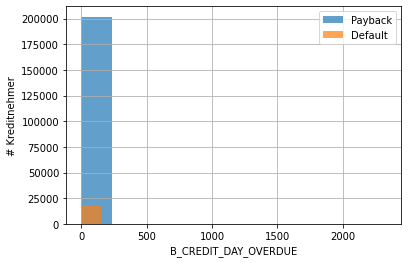

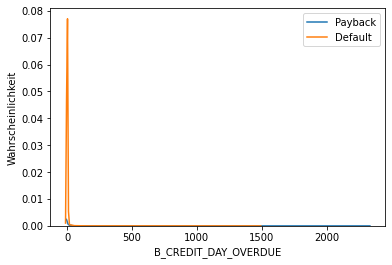

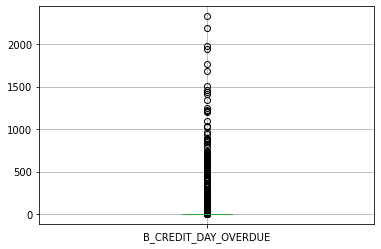

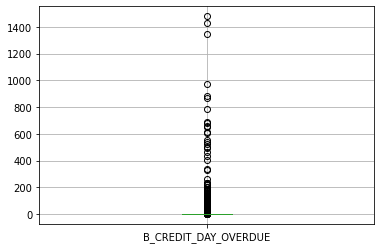

### B_DAYS_CREDIT_ENDDATE

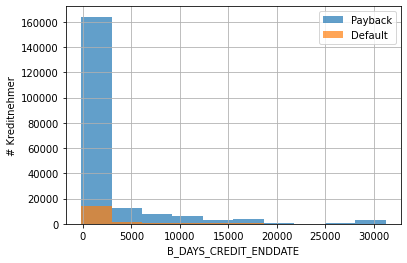

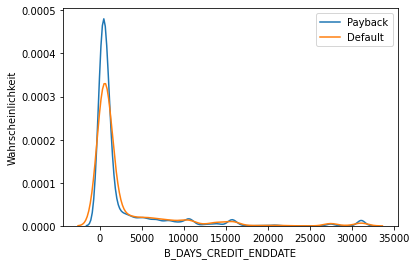

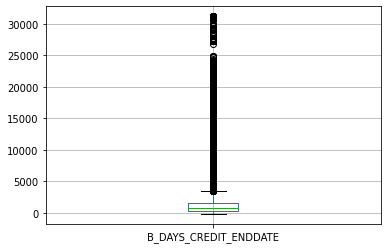

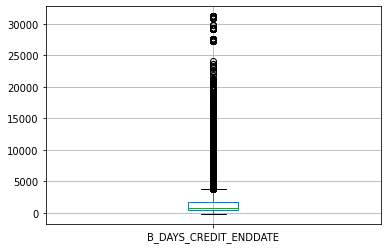

### B_AMT_CREDIT_SUM

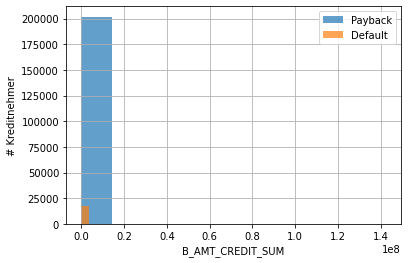

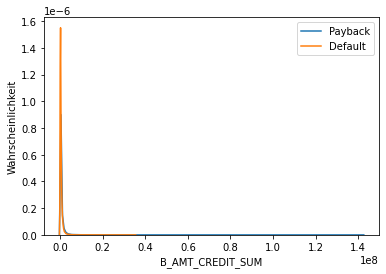

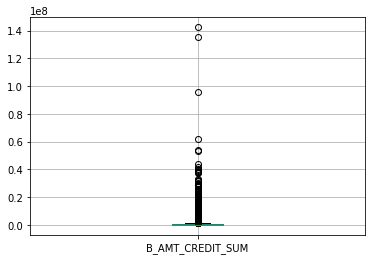

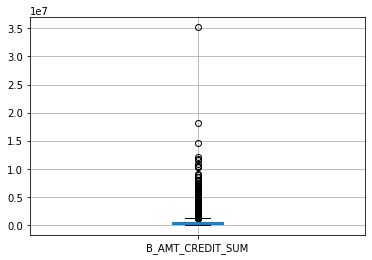

### B_AMT_CREDIT_SUM_DEBT

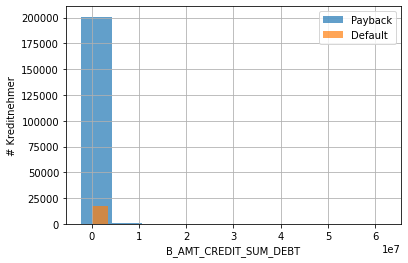

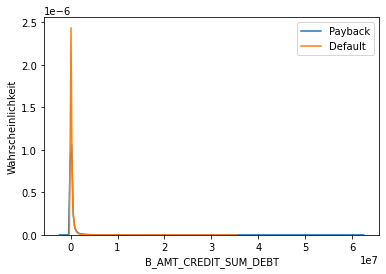

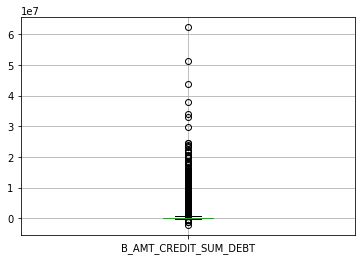

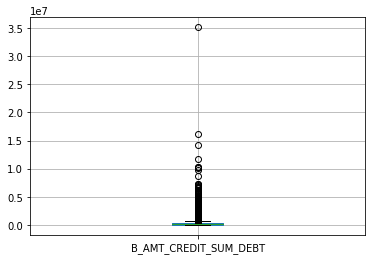

### B_AMT_CREDIT_SUM_OVERDUE

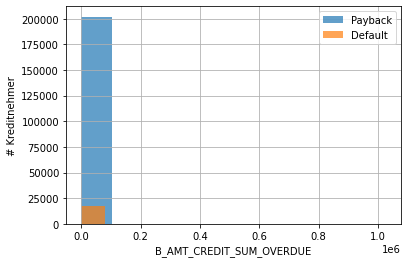

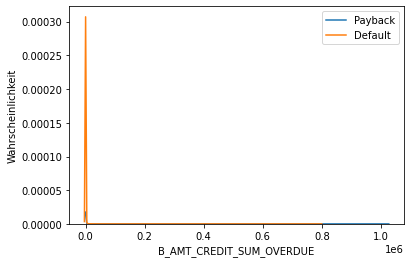

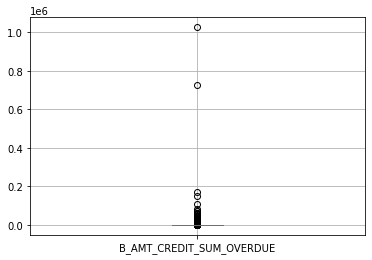

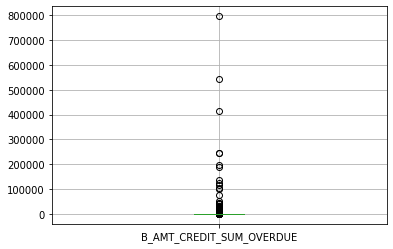

### B_AMT_ANNUITY

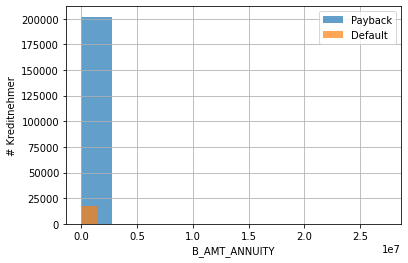

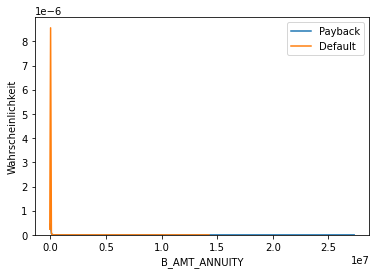

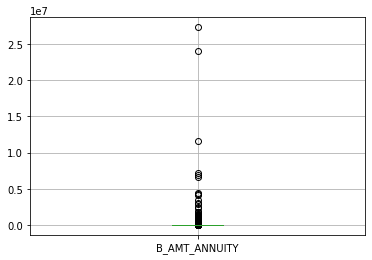

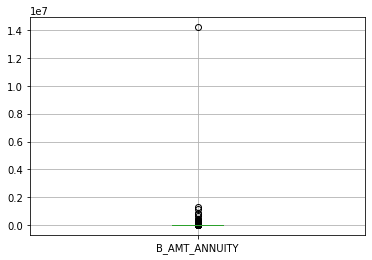

In [12]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()

In [13]:
todo = ["B_CREDIT_DAY_OVERDUE","B_AMT_CREDIT_SUM","B_AMT_CREDIT_SUM_DEBT","B_AMT_CREDIT_SUM_OVERDUE","B_AMT_ANNUITY"]

In [14]:
bureau[todo].head()

,B_CREDIT_DAY_OVERDUE,B_AMT_CREDIT_SUM,B_AMT_CREDIT_SUM_DEBT,B_AMT_CREDIT_SUM_OVERDUE,B_AMT_ANNUITY
SK_ID_CURR,,,,,
100002,0.0,212745.0,81927.0,0.0,0.0
100003,0.0,810000.0,0.0,0.0,0.0
100004,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN
100008,0.0,267606.0,240057.0,0.0,0.0


B_CREDIT_DAY_OVERDUE

In [15]:
head = "B_CREDIT_DAY_OVERDUE"

In [16]:
print(bureau[head].quantile(1))
print(bureau[head].quantile(0.99))
print(bureau[head].quantile(0.95))

2329.0
6.0
0.0


In [17]:
ID_DROP = bureau[bureau[head] > bureau[head].quantile(0.99)].index.values

In [18]:
bureau.loc[ID_DROP, head] = np.nan

B_AMT_CREDIT_SUM

In [19]:
head = "B_AMT_CREDIT_SUM"

In [20]:
print(bureau[head].quantile(1))
print(bureau[head].quantile(0.95))
print(bureau[head].quantile(0.9))

142290000.0
1980000.0
1277115.5999999987


In [21]:
ID_DROP = bureau[bureau[head] > bureau[head].quantile(0.95)].index.values

In [22]:
bureau.loc[ID_DROP, head] = np.nan

B_AMT_CREDIT_SUM_DEBT

In [23]:
head = "B_AMT_CREDIT_SUM_DEBT"

In [24]:
print(bureau[head].quantile(1))
print(bureau[head].quantile(0.95))
print(bureau[head].quantile(0.9))

62218953.0
1047084.9749999985
609237.225


In [25]:
print(bureau[head].quantile(0))
print(bureau[head].quantile(0.05))
print(bureau[head].quantile(0.1))

-2167229.34
0.0
0.0


In [26]:
ID_DROP = bureau[bureau[head] > bureau[head].quantile(0.95)].index.values
ID_DROP_2 = bureau[bureau[head] < bureau[head].quantile(0.05)].index.values

In [27]:
bureau.loc[ID_DROP, head] = np.nan
bureau.loc[ID_DROP_2, head] = np.nan

B_AMT_CREDIT_SUM_OVERDUE

In [28]:
head = "B_AMT_CREDIT_SUM_OVERDUE"

In [29]:
print(bureau[head].quantile(1))
print(bureau[head].quantile(0.99))
print(bureau[head].quantile(0.95))

1025635.5
1.5
0.0


In [30]:
ID_DROP = bureau[bureau[head] > bureau[head].quantile(0.99)].index.values

In [31]:
bureau.loc[ID_DROP, head] = np.nan

B_AMT_ANNUITY

In [32]:
head = "B_AMT_ANNUITY"

In [33]:
print(bureau[head].quantile(1))
print(bureau[head].quantile(0.95))
print(bureau[head].quantile(0.9))

27282428.7525
18885.26249999996
9813.289499999995


In [34]:
ID_DROP = bureau[bureau[head] > bureau[head].quantile(0.95)].index.values

In [35]:
bureau.loc[ID_DROP, head] = np.nan

## Plot Ergebnisse

### B_CREDIT_DAY_OVERDUE

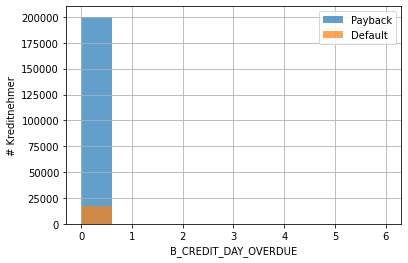

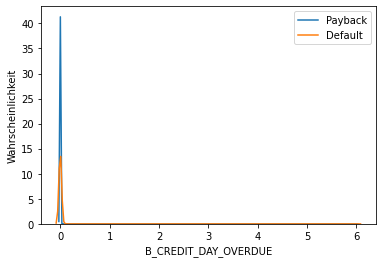

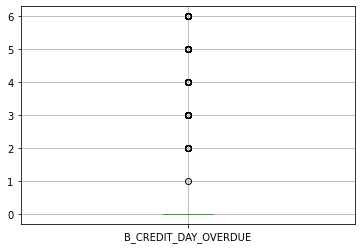

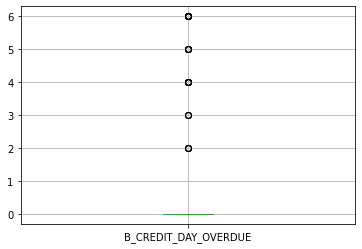

### B_AMT_CREDIT_SUM

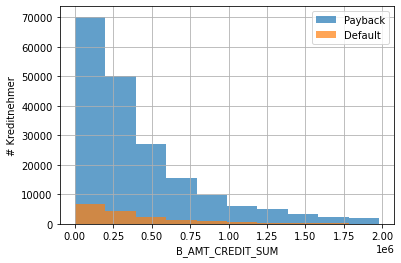

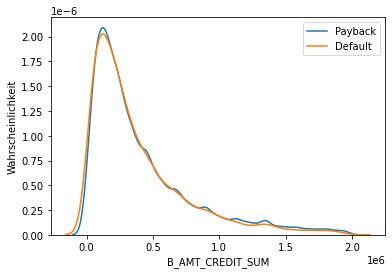

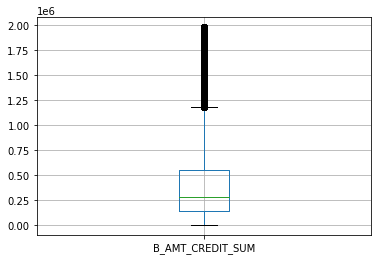

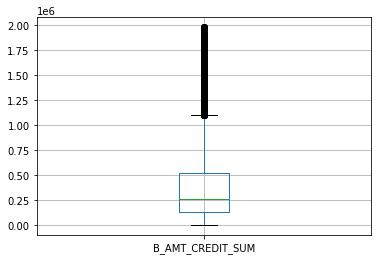

### B_AMT_CREDIT_SUM_DEBT

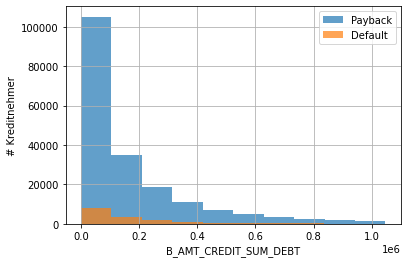

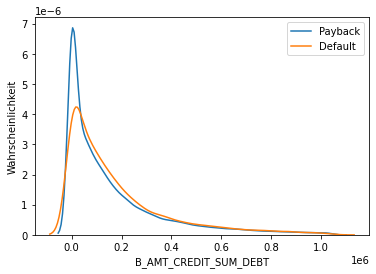

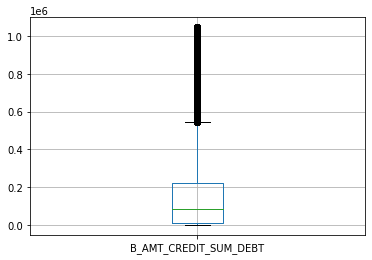

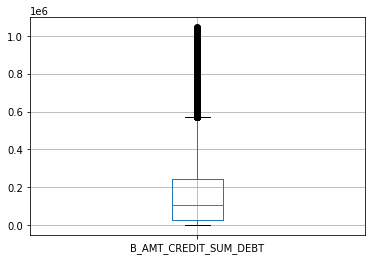

### B_AMT_CREDIT_SUM_OVERDUE

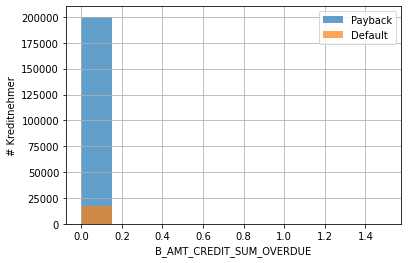

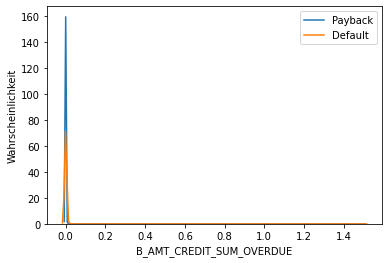

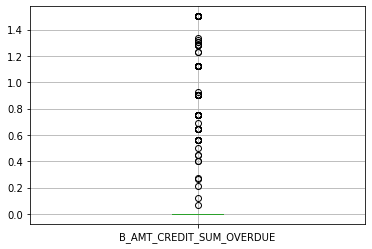

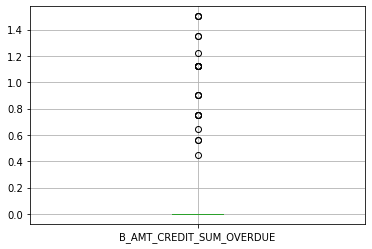

### B_AMT_ANNUITY

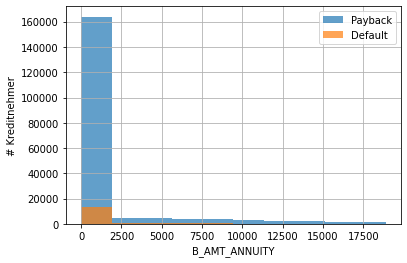

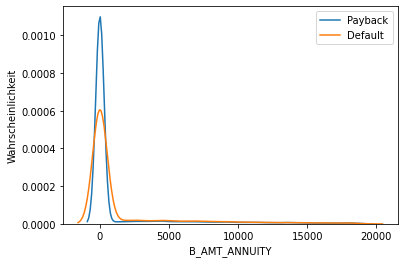

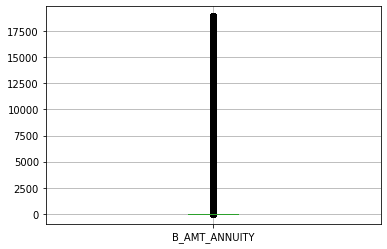

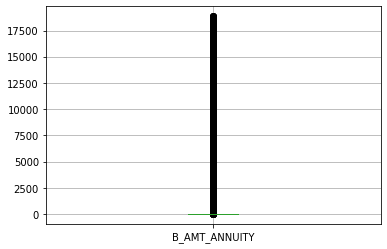

In [36]:
for head in todo:

    display(Markdown("### {head}".format(head=head)))

    payback = bureau.loc[ID_Payback]
    default = bureau.loc[ID_Default]

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()

    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()


In [37]:
bureau.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "bureau.csv")